In [1]:
#imports
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
scipy: 1.13.1
Numpy: 1.26.4
Matplotlib: 3.9.2
pandas: 2.2.2
sklearn: 1.5.1


In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ['id', 'clump_thinkness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)

In [18]:
df.replace("?", -99999, inplace=True)
print(df.axes)

df.drop(['id'], axis=1, inplace=True)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thinkness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [19]:
print(df.describe())

       clump_thinkness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


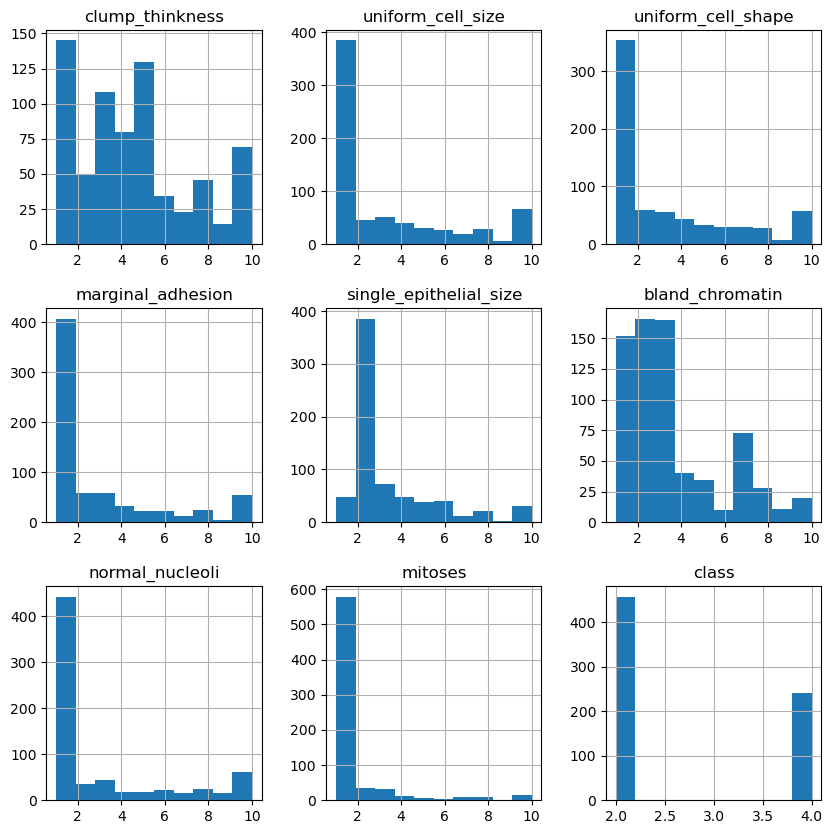

In [20]:
df.hist(figsize = (10,10))
plt.show()

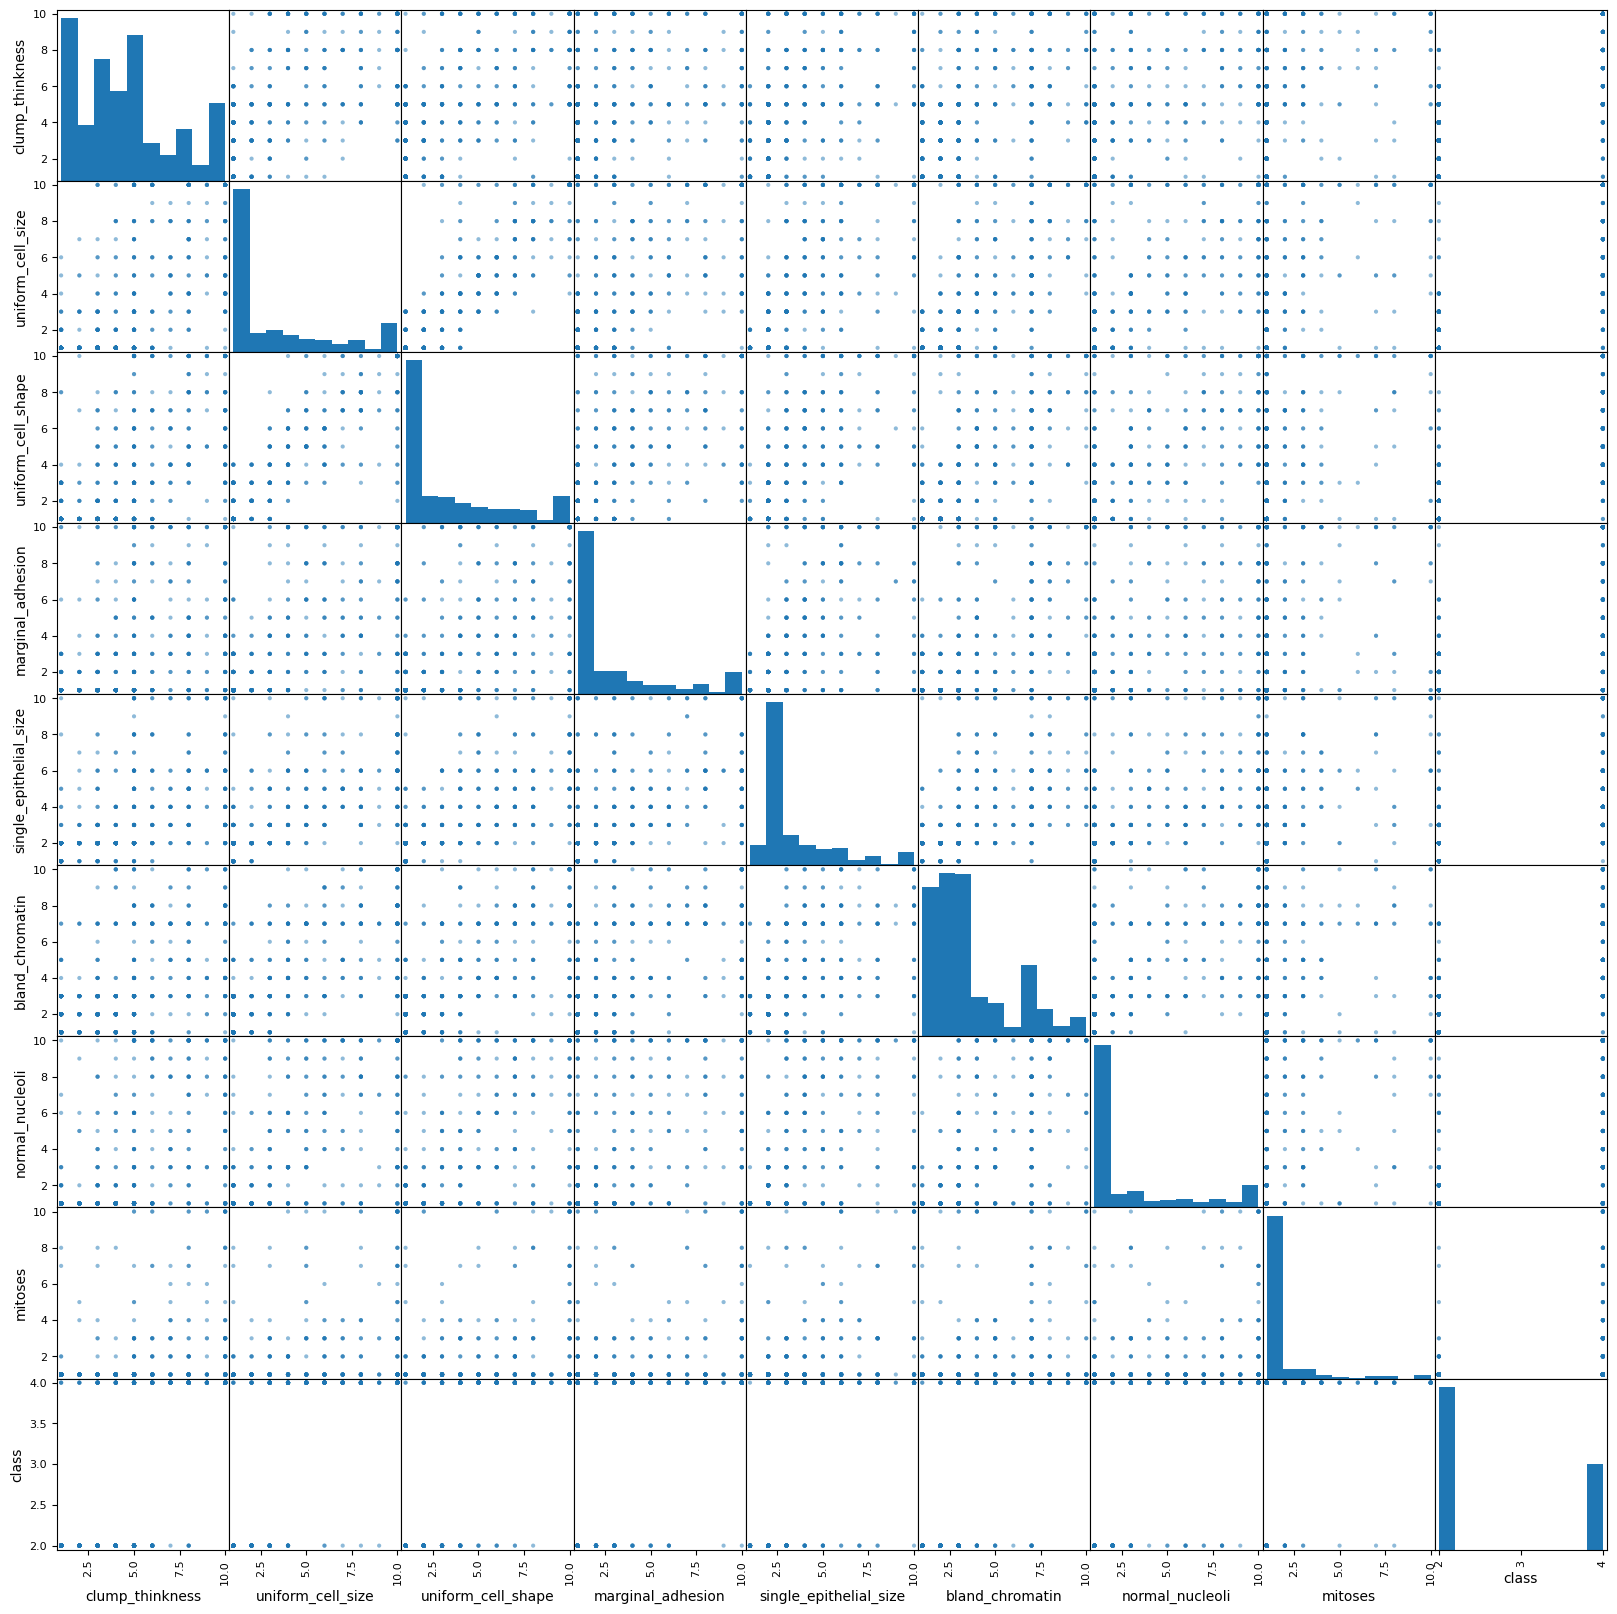

In [21]:
scatter_matrix(df,figsize=(20,20))
plt.show()

In [22]:
X = np.array(df.drop(['class'],axis=1))
y= np.array(df['class'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
seed = 8
scoring = 'accuracy'

In [24]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

results = []
names = []
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))

KNN
0.9642857142857143
SVM
0.7
